# Bibliotecas

Primeiro, vamos importar as bibliotecas necessárias e renomeá-las para facilitar o uso em nosso código. A seguir, temos uma breve descrição de cada biblioteca:

- **NumPy** (renomeada como `np`): Biblioteca que fornece suporte para arrays multidimensionais e funções matemáticas eficientes para manipulação de grandes conjuntos de dados numéricos.

- **Matplotlib** (renomeada como `plt`): Biblioteca utilizada para a criação de gráficos e visualizações de dados. Ela oferece uma ampla gama de opções para gerar gráficos 2D, como linhas, barras, dispersões, histogramas, entre outros.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Atividade mínima

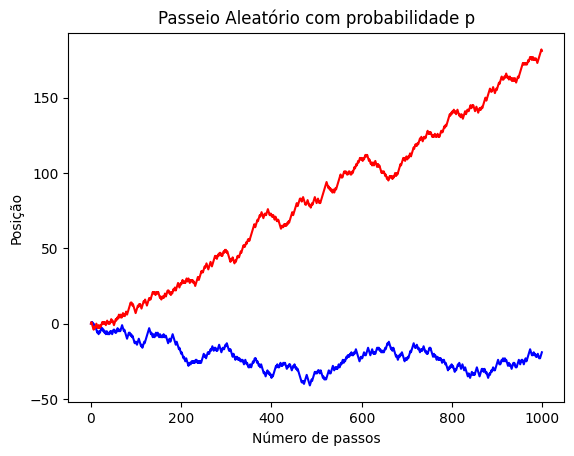

In [9]:
def passeio_aleatorio(N, p):
    """
    Realiza um passeio aleatório de N passos, onde em cada passo o caminhante pode se mover
    para frente (+1) ou para trás (-1) com uma probabilidade p.

    Parâmetros:
    N (int): O número de passos do passeio aleatório.
    p (float): A probabilidade de o caminhante dar um passo para frente (+1).
    rng (np.random.Generator): Um gerador de números aleatórios (como o `np.random.Generator`)
                                para garantir a geração de números aleatórios de maneira controlada.

    Retorna:
    np.ndarray: Um array de tamanho N, contendo as posições do passeio aleatório ao longo do tempo.
                A posição inicial é 0, e as subsequentes são determinadas pela soma cumulativa dos passos.
    """
    posicoes = np.zeros(N)  # Inicializa o array para armazenar as posições
    # Gera os passos (-1 ou +1) com base na probabilidade p
    passos = rng.choice([1, -1], size=N-1, p=[p, 1-p])
    posicoes[1:] = np.cumsum(passos)  # Atualiza as posições com a soma cumulativa dos passos
    return posicoes

# Parâmetros
N = 1000  # Número de passos
p_values = [0.5, 0.6]  # Probabilidades p

# Criar o gerador de números aleatórios
rng = np.random.default_rng()

# Gráfico
posicoes_p_0_5 = passeio_aleatorio(N, p=0.5)
plt.plot(posicoes_p_0_5, color='blue')
posicoes_p_0_6 = passeio_aleatorio(N, p=0.6)
plt.plot(posicoes_p_0_6, color='red')
plt.title("Passeio Aleatório com probabilidade p")
plt.xlabel("Número de passos")
plt.ylabel("Posição")
plt.show()

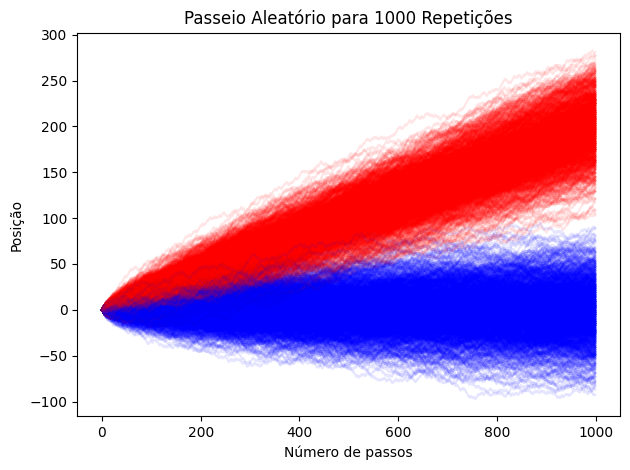

In [10]:
repeticoes = 1000  # Número de repetições

posicoes_i_0_5 = []
posicoes_m_0_5 = []
posicoes_f_0_5 = []

posicoes_i_0_6 = []
posicoes_m_0_6 = []
posicoes_f_0_6 = []

# Gráfico
for _ in range(repeticoes):  # Repetição 100 vezes
    posicoes_p_0_5 = passeio_aleatorio(N, p=0.5)
    plt.plot(posicoes_p_0_5, color='blue', alpha = 0.1)
    posicoes_p_0_6 = passeio_aleatorio(N, p=0.6)
    plt.plot(posicoes_p_0_6, color='red', alpha = 0.1)

    posicoes_i_0_5.append(posicoes_p_0_5[0])
    posicoes_m_0_5.append(posicoes_p_0_5[N // 2])
    posicoes_f_0_5.append(posicoes_p_0_5[-1])

    posicoes_i_0_6.append(posicoes_p_0_6[0])
    posicoes_m_0_6.append(posicoes_p_0_6[N // 2])
    posicoes_f_0_6.append(posicoes_p_0_6[-1])



plt.title("Passeio Aleatório para 1000 Repetições")
plt.xlabel("Número de passos")
plt.ylabel("Posição")


# Exibir gráfico
plt.tight_layout()
plt.show()

# Atividades intermediárias

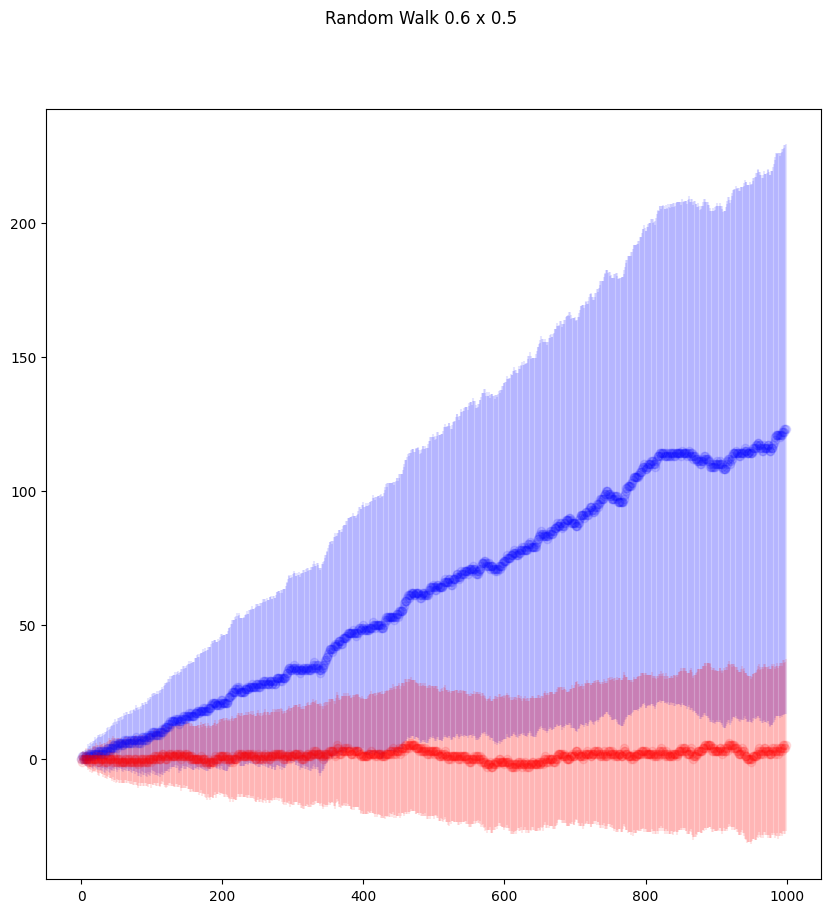

In [11]:
def desvio(X):
    """
    Calcula o desvio padrão e a mediana de um conjunto de dados.

    Parâmetros:
    - X (array-like): Lista ou array contendo os dados para os quais o desvio padrão e a mediana serão calculados.

    Retorna:
    - desvio (float): O desvio padrão calculado para os dados.
    - x (float): A mediana dos dados fornecidos.

    Observação:
    O desvio padrão é calculado com base na fórmula de variância amostral, considerando (m-1) no denominador,
    onde m é o número de elementos em X.
    """

    m = len(X)
    x = np.median(X ,axis=0)
    deltax = []
    for i in range(m):
        deltax.append((x-X[i])**2)
    desvio = (np.sum(deltax,axis=0)/(m-1))**(1/2)

    return desvio ,x

Y1 = Y2 = []
X1 = X2 = []
for i in range(100):
    y2 = passeio_aleatorio(N=1000,p=0.5)
    X2 = np.arange(len(y2)) # Create a sequence of numbers for X2
#    y2,X2 = passeio_aleatorio(N=1000,p=0.5)
    Y2.append(y2)

desvioy2 , y2 = desvio(Y2)


for i in range(100):
    y1 = passeio_aleatorio(1000,0.6)
    X1 = np.arange(len(y1)) # Create a sequence of numbers for X1
#    y1,X1 = passeio_aleatorio(1000,0.6)
    Y1.append(y1)

desvioy1 , y1 = desvio(Y1)


fig1 , ax1 = plt.subplots(figsize=(10,10))

ax1.errorbar(x=X1,y=y1,yerr=desvioy1,xerr=0,alpha=0.1,fmt='o',color ='Blue')

ax1.errorbar(x=X2,y=y2,yerr=desvioy2,xerr=0,alpha=0.1,fmt='o',color ='Red')
plt.suptitle('Random Walk 0.6 x 0.5')
plt.show()

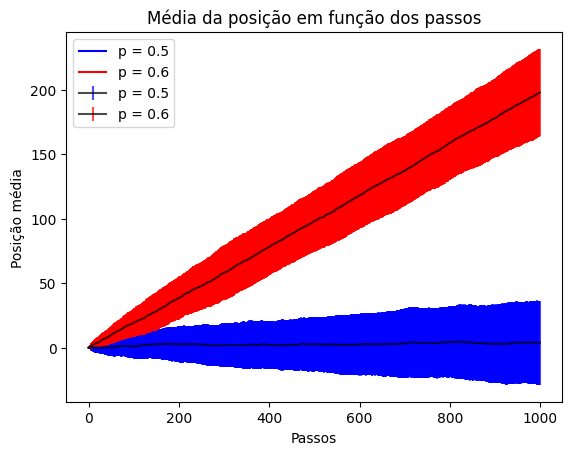

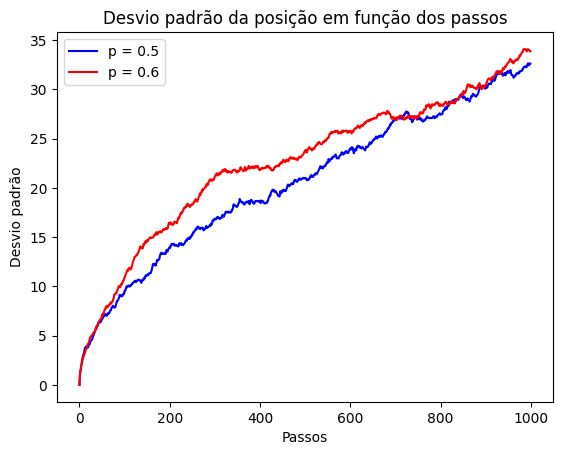

In [12]:
'''
Calcula a média e o desvio padrão da posição do caminhante em função do número de passos.
Plota o gráfico da média e do desvio padrao em diferentes probabilidades.

Arg:
  posições1, posições2: Lista
    Armazena as posições de cada passo dado pelo caminhante em probabilidades específicas

  k: Int
    Parâmetro de controle do loop 'for'

  media1, media2: Float
    Armazena a média dos passos dados em cada passeio realizado no código acima

  desvio1, desvio2: Float
    Armazena o desvio padrão dos passos dados em cada passeio realizado no código acima


'''


posições1 = []
posições2 = []

for k in range(100):
  posições1.append(passeio_aleatorio(N,p=0.5))
  posições2.append(passeio_aleatorio(N,p=0.6))

posições1 = np.array(posições1)
posições2 = np.array(posições2)

media1 = np.mean(posições1, axis = 0)
desvio1 = np.std(posições1, axis = 0)
media2 = np.mean(posições2, axis = 0)
desvio2 = np.std(posições2, axis = 0)

#Número de passosem ax1 e ax2
passos = np.arange(N)

# Gráfico da média
plt.errorbar(passos, media1, yerr=desvio1, fmt='black', ecolor='b', label='p = 0.5', alpha=0.7)
plt.errorbar(passos, media2, yerr=desvio2, fmt='black', ecolor='r', label='p = 0.6',alpha=0.7)
plt.plot(passos, media1, 'b', label='p = 0.5')
plt.plot(passos, media2, 'r', label='p = 0.6')
plt.xlabel('Passos')
plt.ylabel('Posição média')
plt.title('Média da posição em função dos passos')
plt.legend()
plt.show()

# Gráfico do desvio padrão
plt.plot(passos, desvio1, 'b', label='p = 0.5')
plt.plot(passos, desvio2, 'r', label='p = 0.6')
plt.xlabel('Passos')
plt.ylabel('Desvio padrão')
plt.title('Desvio padrão da posição em função dos passos')
plt.legend()
plt.show()

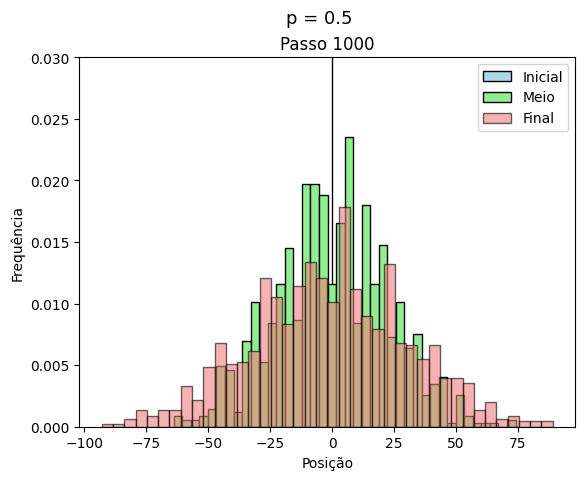

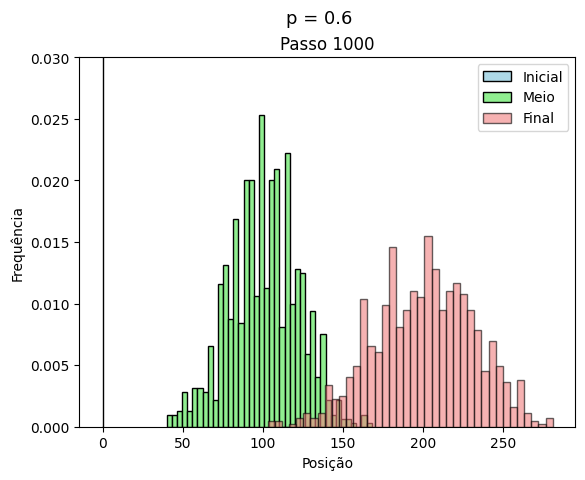

In [13]:
'''
Faz um histograma da posição do caminhante no início, no meio e no fim do passeio.
Plota os 3 histogramas em um gráfico para cada probabilidade trabalhada.

'''

#plt.subplot(1, 3, 1)
plt.hist(posicoes_i_0_5, bins=20, edgecolor='black', color='lightblue', density= True, label='Inicial')
plt.xlabel('Posição')
plt.ylabel('Frequência')

#plt.subplot(1, 3, 2)
plt.hist(posicoes_m_0_5, bins=40, edgecolor='black', color='lightgreen', density= True, label='Meio')
#plt.xlabel('Posição')
plt.title(f'Passo {N // 2}')

#plt.subplot(1, 3, 3)
plt.hist(posicoes_f_0_5, bins=40, edgecolor='black', color='lightcoral', density= True, alpha = 0.6, label='Final')
#plt.xlabel('Posição')
plt.title(f'Passo {N}')

plt.ylim(0, 0.03)

plt.suptitle(f'p = 0.5', fontsize=13)
plt.legend()
plt.show()


#plt.subplot(1, 3, 1)
plt.hist(posicoes_i_0_6, bins=20, edgecolor='black', color='lightblue', density= True, label='Inicial')
plt.xlabel('Posição')
plt.ylabel('Frequência')
plt.title(f'Passo 0')

#plt.subplot(1, 3, 2)
plt.hist(posicoes_m_0_6, bins=40, edgecolor='black', color='lightgreen', density= True, label='Meio')
plt.xlabel('Posição')
plt.title(f'Passo {N // 2}')

#plt.subplot(1, 3, 3)
plt.hist(posicoes_f_0_6, bins=40, edgecolor='black', color='lightcoral', density= True, alpha = 0.6, label='Final')
plt.xlabel('Posição')
plt.title(f'Passo {N}')

plt.ylim(0, 0.03)

plt.suptitle(f'p = 0.6', fontsize=13)
plt.legend()
plt.show()